In [103]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import nquad,quad
from rosenbrock import * 

In [104]:
a, b = 1., 100.
x0, x1 = -2., 2.
y0, y1 = 1.4, 1.6
fxy = 1/(x1-x0)*1/(y1-y0)

def g(x, y, a=a, b=b):
    return (a - x)**2. + b*(y - x**2.)**2.

def fZ(z,a=a,b=b):
    return -_f(x1,a,b)(z) + _f(x0,a,b)(z) 

def _f(x,a=a,b=b):
    return lambda z:fxy*np.sqrt(b)/(b) * np.log(np.abs(x -a +np.sqrt((x-a)**2)+a**2-z-a))

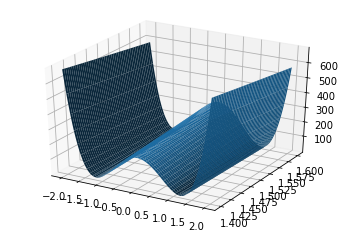

In [105]:
X = np.linspace(x0,x1,1000)
Y = np.linspace(y0,y1,1000)
X, Y = np.meshgrid(X, Y)
Z = g(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z)

In [106]:
min(Z.flatten())

0.03355668007943033

In [107]:
max(Z.flatten())

685.0000000000001

In [108]:
print(
    quad( lambda z: z*fZ(z), min(Z.flatten()), max(Z.flatten()) )
    )

(172.8339329570816, 8.687109982474794e-07)


In [109]:
x = 0.; z = 226.
x -a +np.sqrt((x-a)**2)+a**2-z-a

-226.0

In [110]:
g(0,1.5)

226.0

In [111]:
fxy

1.249999999999999

In [112]:
_f(0.0)(226.)

0.6775668749090352

In [113]:
fZ(700.)

0.00035765403512899585

In [114]:
# for z in range(600):
#     print(_f(x1)(z), _f(x0)(z))

## Alt

In [115]:
def E(m,n):
    return fxy/((n+1)*(m+1))*(x1**(m+1)-x0**(m+1))*(y1**(n+1)-y0**(n+1))

In [116]:
a**2 - 2*a*E(1,0) + E(2,0) + b*E(0,2) - 2*b*E(2,1) + b*E(4,1)

307.66666666666674

In [117]:
x0

-2.0